In [1]:
import numpy as np
import pyneb as pn

In [5]:
s3 = pn.Atom('S', 3)

In [7]:
s3.lineList


array([ 334703.72473799,  120003.66681167,  187078.0802112 ,
          8829.38545849,    9068.61404861,    9530.61291005,
          3680.70161049,    3721.62945546,    3797.17093389,
          6312.06056217,    1704.39283391,    1713.11404217,
          1728.94200506,    2111.29820869,    3172.58522709])

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

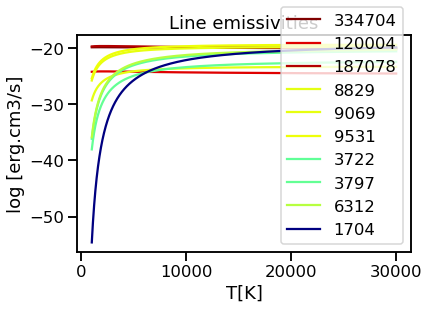

In [33]:
s3.plotEmiss()

In [25]:
densities = np.logspace(0.0, 6.0)


In [26]:
em = s3.getEmissivity(1.e4, densities)
em.shape

(6, 6, 50)

In [27]:
s3.getTransition('33.47m'), s3.getTransition('18.71m')

((2, 1), (3, 2))

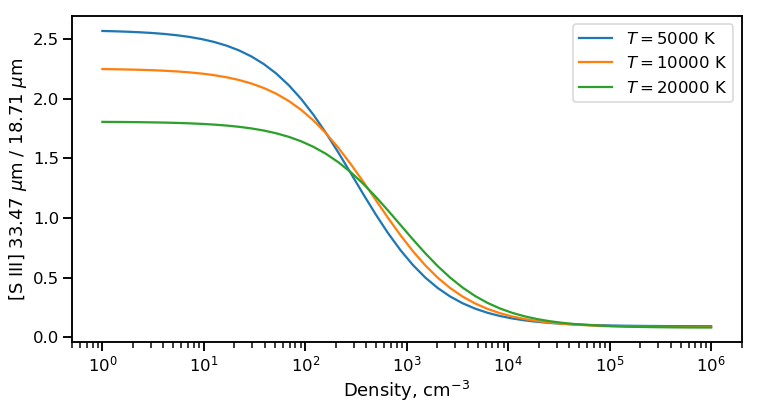

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
for T in 5000, 1e4, 2e4:
    em33 = s3.getEmissivity(T, densities, 2, 1)
    em18 = s3.getEmissivity(T, densities, 3, 2)
    ax.plot(densities, em33/em18, label=f"$T = {T:.0f}$ K")
ax.legend()
ax.set(
    xscale='log', yscale='linear',
    xlabel="Density, $\mathrm{cm}^{-3}$",
    ylabel="[S III] 33.47 $\mu$m / 18.71 $\mu$m",
)
fig.savefig("siii-mir-density-ratio.pdf")